## 🩶 시계열 데이터 프로젝트 - 은 ETF 가격 예측
- 은 ETF 중 시장 규모가 가장 큰 BlackRock 주식회사의 iShares Silver Trust(SLV)의 향후 1년 간의 주가 예측
- SLV의 주가 단위는 달러($)이며, 은 1온스(약 28g)의 가격을 기준으로 함
- 비슷한 성격을 가진 종목인 금 ETF(GLD)와의 연관성도 분석

### 📑 데이터 분석

In [1]:
import yfinance as yf

# yfinance에서 2015년부터의 금과 은 ETF(GLD, SLV) 데이터만 가져와서 데이터프레임 생성
# 가격 데이터는 종가(Adj Close)를 기준으로 함
columns = ['GLD', 'SLV']

f_df = yf.download(columns, start='2015-01-01')['Adj Close'].round(4)
f_df

[*********************100%%**********************]  2 of 2 completed


Ticker,GLD,SLV
Date,,
2015-01-02,114.08,15.11
2015-01-05,115.80,15.50
2015-01-06,117.12,15.83
2015-01-07,116.43,15.85
2015-01-08,115.94,15.64
...,...,...
2024-06-11,214.15,26.71
2024-06-12,214.72,27.03
2024-06-13,212.97,26.43


In [2]:
# 데이터프레임 정보 확인
f_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2380 entries, 2015-01-02 to 2024-06-17
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GLD     2380 non-null   float64
 1   SLV     2380 non-null   float64
dtypes: float64(2)
memory usage: 55.8 KB


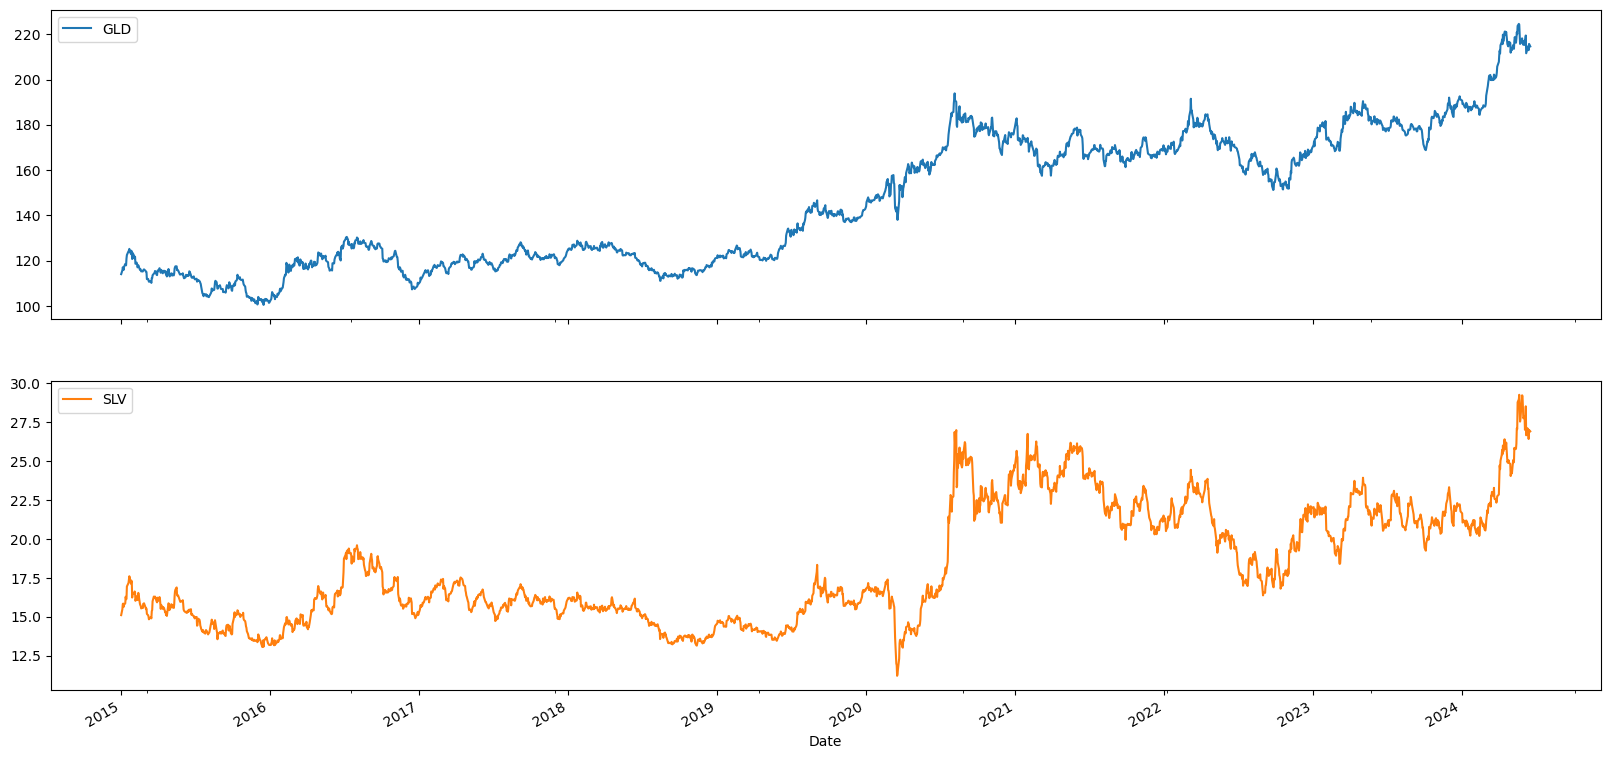

In [3]:
import matplotlib.pyplot as plt

# 금, 은 ETF의 시간에 따른 주가 시각화
f_df.plot(figsize=(20, 10), subplots=True)
plt.show()

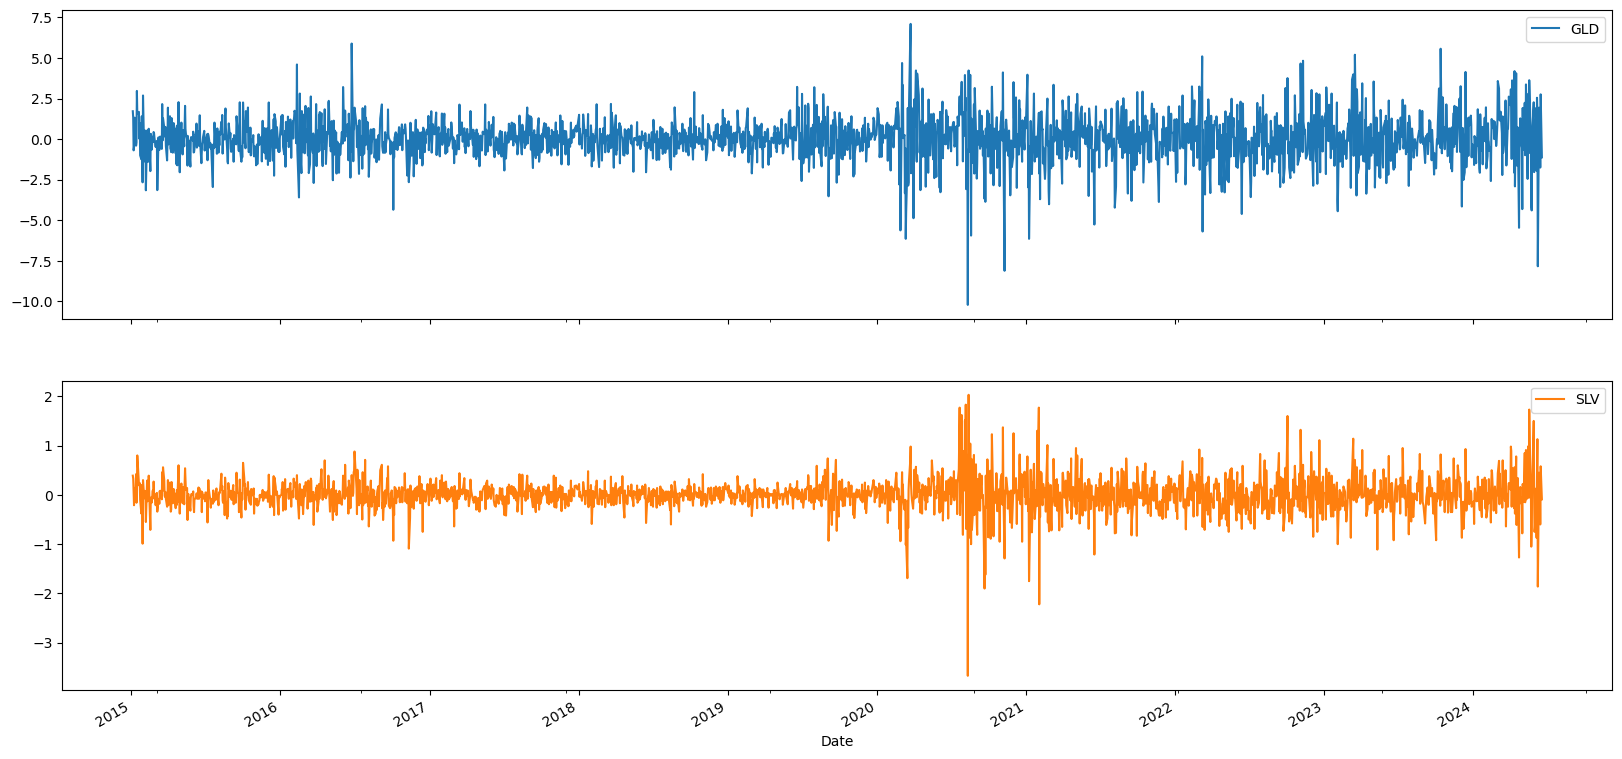

In [4]:
# 금, 은 ETF의 시간에 따른 주가 변화량 시각화
f_df.diff().plot(figsize=(20, 10), subplots=True)
plt.show()

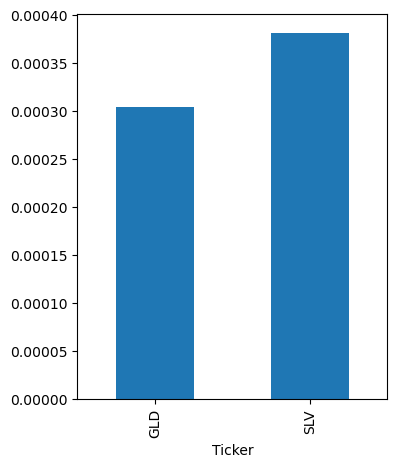

In [5]:
# 금과 은 ETF의 주가 변화율 시각화
f_df.pct_change().mean().plot(kind='bar', figsize=(4, 5))
plt.show()

#### 분석
- 전반적으로 은 ETF의 가격 변화율이 금에 비해 더 심하게 나타났으며, 특히 2020년대에 큰 변동이 있었다.  
  이는 COVID-19 팬데믹의 영향으로, 그래프에 나타났듯이 초기에는 불확실성과 공포로 인해 은 시세가 급락했지만,  
  이후 안전자산에 대한 수요 증가 및 중앙 은행의 대규모 통화 완화 정책 등으로 다시 시세가 급증했다.

---

- 그 외 시간대에서 금과 은 ETF의 주가는 대부분의 시간대에서 비슷한 양상을 보이는 것을 알 수 있다.
- 변화량 그래프의 형태로 보아, 금과 은 ETF 모두 분산이 일정하지 않다. 

### 💰 수익률 산출
- 현재 시점에 대한 다음 시점의 수익률 산출
- 로그를 취함으로서 계산을 용이하게 하며, 전반적인 데이터 분포를 대칭형으로 맞춰줌

In [6]:
import numpy as np

# 금과 은 ETF의 수익률 산출
rate_f_df = np.log(f_df / f_df.shift(1))
rate_f_df = rate_f_df.dropna()
rate_f_df

Ticker,GLD,SLV
Date,,
2015-01-05,0.014965,0.025483
2015-01-06,0.011334,0.021067
2015-01-07,-0.005909,0.001263
2015-01-08,-0.004217,-0.013338
2015-01-09,0.011321,0.008278
...,...,...
2024-06-11,0.002853,-0.015233
2024-06-12,0.002658,0.011909
2024-06-13,-0.008184,-0.022448


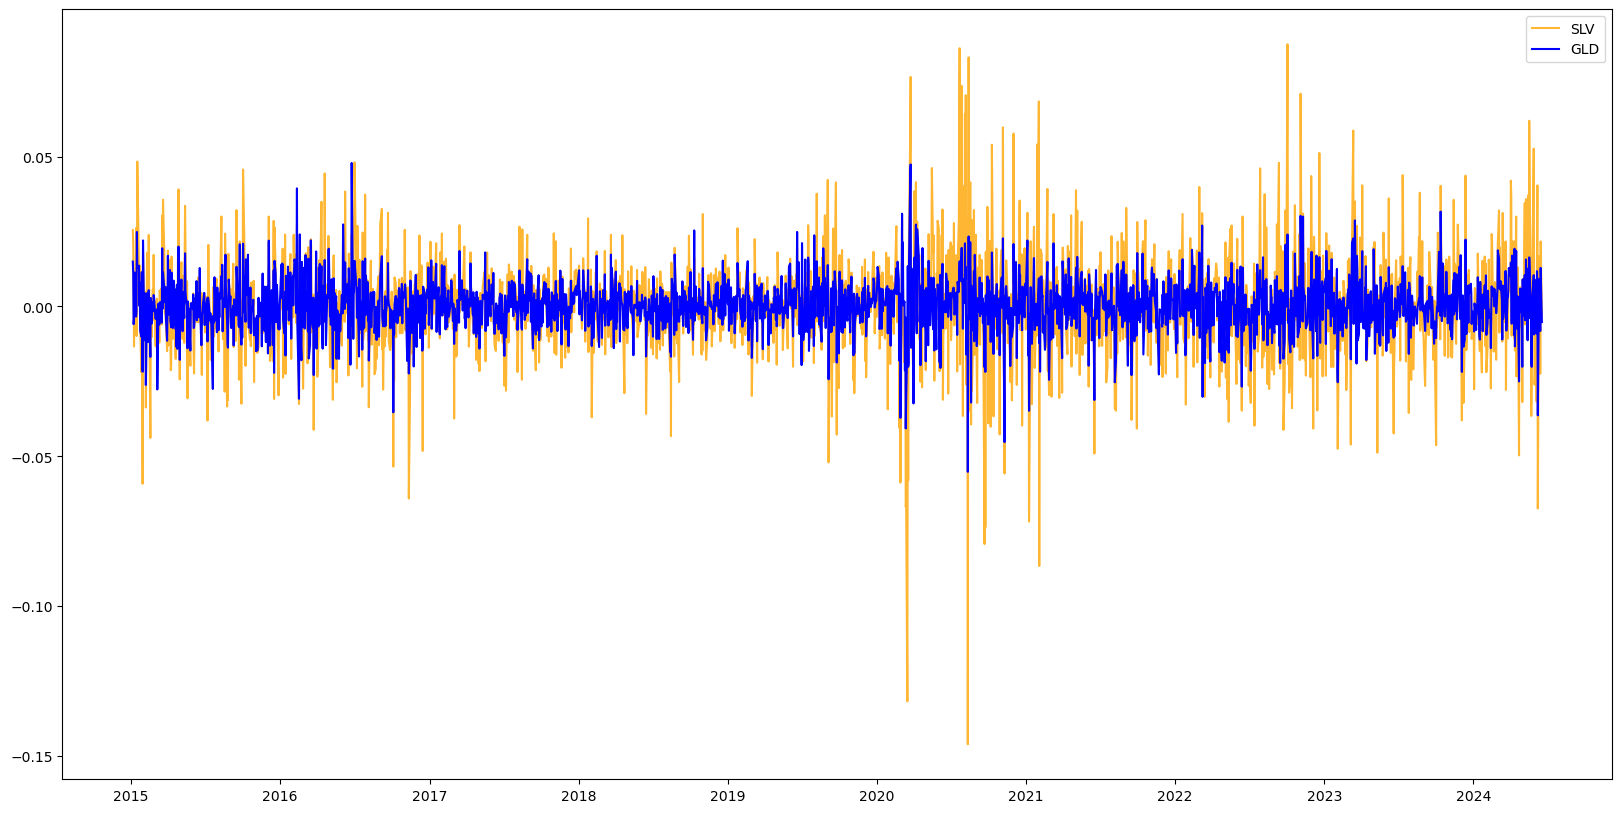

In [62]:
import matplotlib.pyplot as plt

# 금과 은 ETF의 수익률을 하나의 플롯에 시각화
plt.figure(figsize=(20, 10))
plt.plot(rate_f_df['SLV'], c='orange', alpha=0.8, label='SLV')
plt.plot(rate_f_df['GLD'], c='blue', alpha=1, label='GLD')
plt.legend()
plt.show()

In [9]:
# 연율화(연간 수익률) 산출
# 연간 영업일 수인 252일을 기준으로 함
rate_f_df.mean() * 252

Ticker
GLD    0.066938
SLV    0.061174
dtype: float64

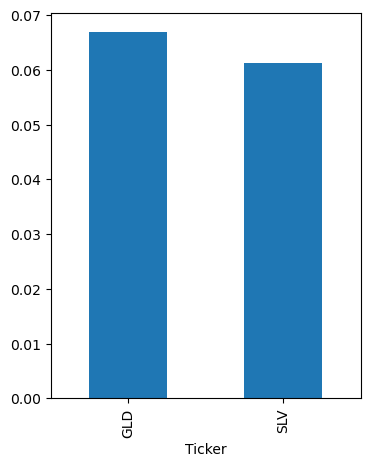

In [10]:
# 연율화를 바플롯으로 시각화
(rate_f_df.mean() * 252).plot(kind='bar', figsize=(4, 5))
plt.show()

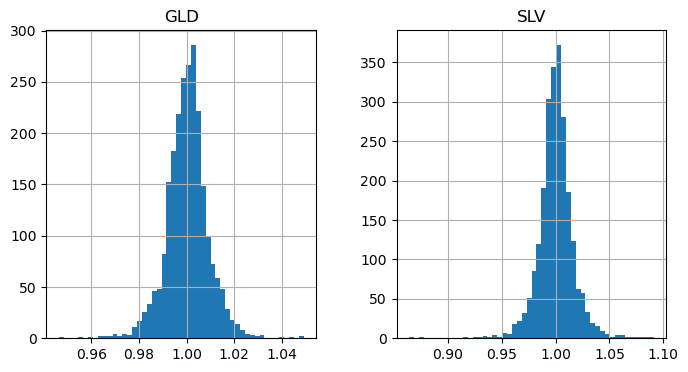

In [61]:
# 로그를 취하지 않았을 때의 금과 은 ETF의 수익률 분포를 히스토그램으로 출력
np.exp(rate_f_df).hist(figsize=(8, 4), bins=50)
plt.show()

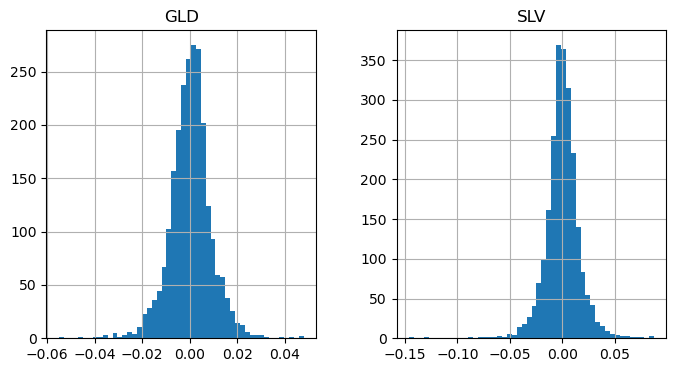

In [11]:
# 금과 은 ETF의 수익률 분포를 히스토그램으로 출력
rate_f_df.hist(figsize=(8, 4), bins=50)
plt.show()

#### 분석
- 금이 은보다 연간 수익률이 근소하게 높다.
- 은 ETF의 수익률은 금에 비해 심하게 변화했다.  
  이는 위의 주가 그래프에서도 알 수 있다.
- 수익률 산출 과정에서 로그를 취했기 때문에, 수익률 분포가 0을 기준으로 대칭에 가까운 형태를 보인다.

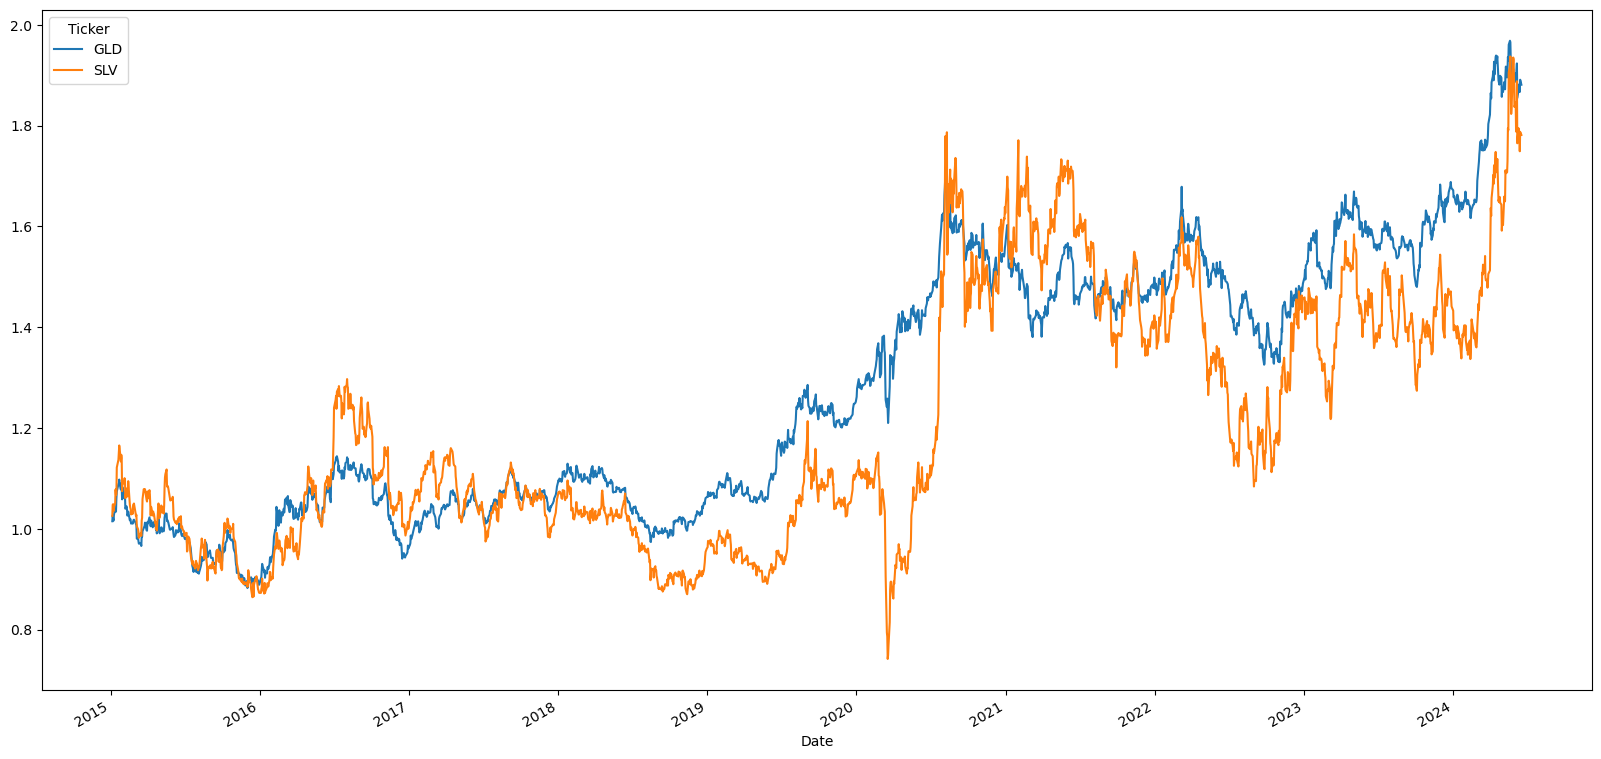

In [12]:
# 일간 수익률 - 단순 수익률
# 로그 수익률에 지수를 취해 값을 원복
rate_f_df.cumsum().apply(np.exp).plot(figsize=(20, 10))
plt.show()

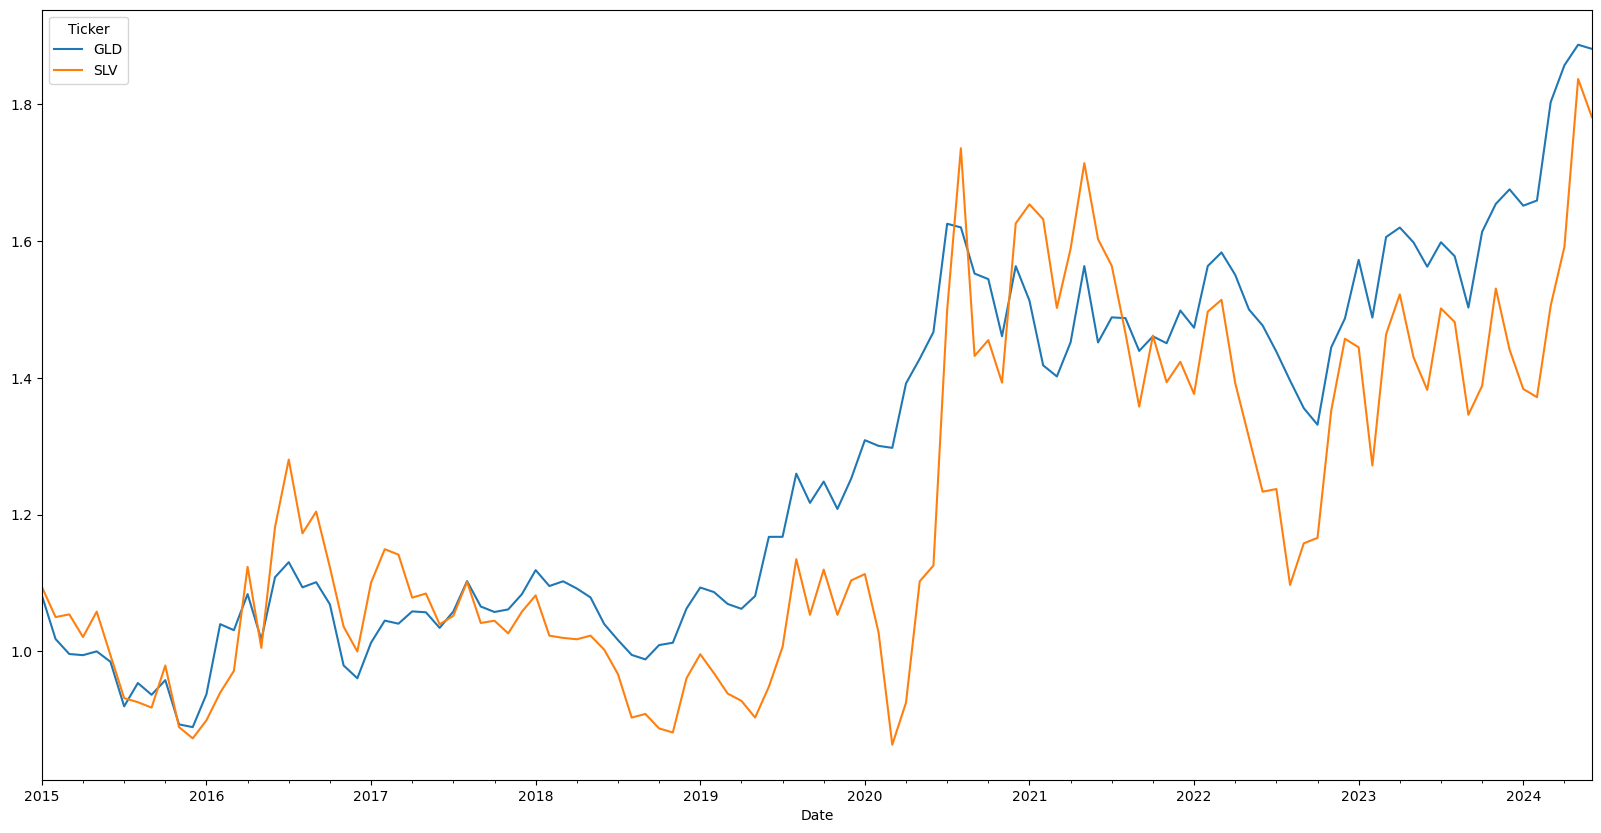

In [13]:
# 월간 수익률 - 단순 수익률
# 매 달(1m)의 마지막(last) 시점에 한 달 간의 누적합을 시각화
rate_f_df.cumsum().apply(np.exp).resample('1m').last().plot(figsize=(20, 10))
plt.show()

#### 분석
- 금이 은에 비해 더욱 안정적인 수익률을 보인다.

### 💰 금, 은 ETF 가격의 상관관계 분석

In [14]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 각 feature의 VIF Score(공분산성, 다른 feature와의 상관관계)를 구해주는 함수
# 이번에는 금과 은 ETF 간 상관관계가 어느 정도인지를 구하기 위해 사용
def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [15]:
# 금과 은 ETF의 VIF Score 출력
get_vif(rate_f_df)

,vif_score,feature
0,2.510015,GLD
1,2.510015,SLV


#### 분석
- 금과 은 ETF 가격 간 상관관계는 높지 않다.

### 📑 종합 분석
- 금이 은에 비해 수익률이 더 높게 나타났으며, 수익률 변화도 더욱 안정적이다.
- 다만, 금과 은의 가격은 현재 점차 상승하고 있으며, 은 ETF의 주당 가격이 금에 비해 훨씬 낮기 때문에  
  적은 자본으로도 투자하기 좋을 것으로 보인다.

### 🩶 은 가격 예측
- ARIMA: 최근 2년 간의 은 ETF 가격 변화로 올해 초 부터의 주가 예측 후, 실제 주가와 비교
- Prophet: 최근 2년 간의 은 ETF 가격 변화 양상으로 향후 1년간의 은 가격 예측

In [16]:
import yfinance as yf

# yfinance에서 2015년부터의 은 ETF 가격(종가 기준) 가져오기
slv_df = yf.download('SLV', start='2015-01-01')['Adj Close'].round(4)
slv_df

[*********************100%%**********************]  1 of 1 completed


Date
2015-01-02    15.11
2015-01-05    15.50
2015-01-06    15.83
2015-01-07    15.85
2015-01-08    15.64
              ...  
2024-06-11    26.71
2024-06-12    27.03
2024-06-13    26.43
2024-06-14    27.01
2024-06-17    26.92
Name: Adj Close, Length: 2380, dtype: float64

In [17]:
# 현재 데이터 정보 확인
slv_df.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 2380 entries, 2015-01-02 to 2024-06-17
Series name: Adj Close
Non-Null Count  Dtype  
--------------  -----  
2380 non-null   float64
dtypes: float64(1)
memory usage: 37.2 KB


#### 중간 분석
- 현재 데이터가 단일 컬럼으로 이루어진 Series 타입이기 때문에, 이하의 작업을 수행하기 위해 데이터프레임으로 변환

In [18]:
import pandas as pd

# pd.DataFrame으로 데이터프레임 형태로 변환
slv_df = pd.DataFrame(slv_df)
slv_df

,Adj Close
Date,
2015-01-02,15.11
2015-01-05,15.50
2015-01-06,15.83
2015-01-07,15.85
2015-01-08,15.64
...,...
2024-06-11,26.71
2024-06-12,27.03
2024-06-13,26.43


In [19]:
# 현재 데이터프레임 정보 확인
slv_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2380 entries, 2015-01-02 to 2024-06-17
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  2380 non-null   float64
dtypes: float64(1)
memory usage: 37.2 KB


In [20]:
# 종가 컬럼명을 종목명인 'SLV'로 변환
slv_df = slv_df.rename(columns={'Adj Close': 'SLV'})
slv_df

,SLV
Date,
2015-01-02,15.11
2015-01-05,15.50
2015-01-06,15.83
2015-01-07,15.85
2015-01-08,15.64
...,...
2024-06-11,26.71
2024-06-12,27.03
2024-06-13,26.43


In [21]:
window_size = 20

# 각 시점 별 다음 20 영업일까지의 주가의 최저가, 중간값, 최고가를 새로운 컬럼으로 생성
slv_df.loc[:, 'min'] = slv_df['SLV'].rolling(window=window_size).min()
slv_df.loc[:, 'median'] = slv_df['SLV'].rolling(window=window_size).median()
slv_df.loc[:, 'max'] = slv_df['SLV'].rolling(window=window_size).max()

slv_df.dropna()

,SLV,min,median,max
Date,,,,
2015-01-30,16.54,15.11,16.265,17.61
2015-02-02,16.47,15.50,16.380,17.61
2015-02-03,16.55,15.64,16.505,17.61
2015-02-04,16.63,15.64,16.545,17.61
2015-02-05,16.58,15.64,16.565,17.61
...,...,...,...,...
2024-06-11,26.71,26.13,27.750,29.27
2024-06-12,27.03,26.67,27.750,29.27
2024-06-13,26.43,26.43,27.750,29.27


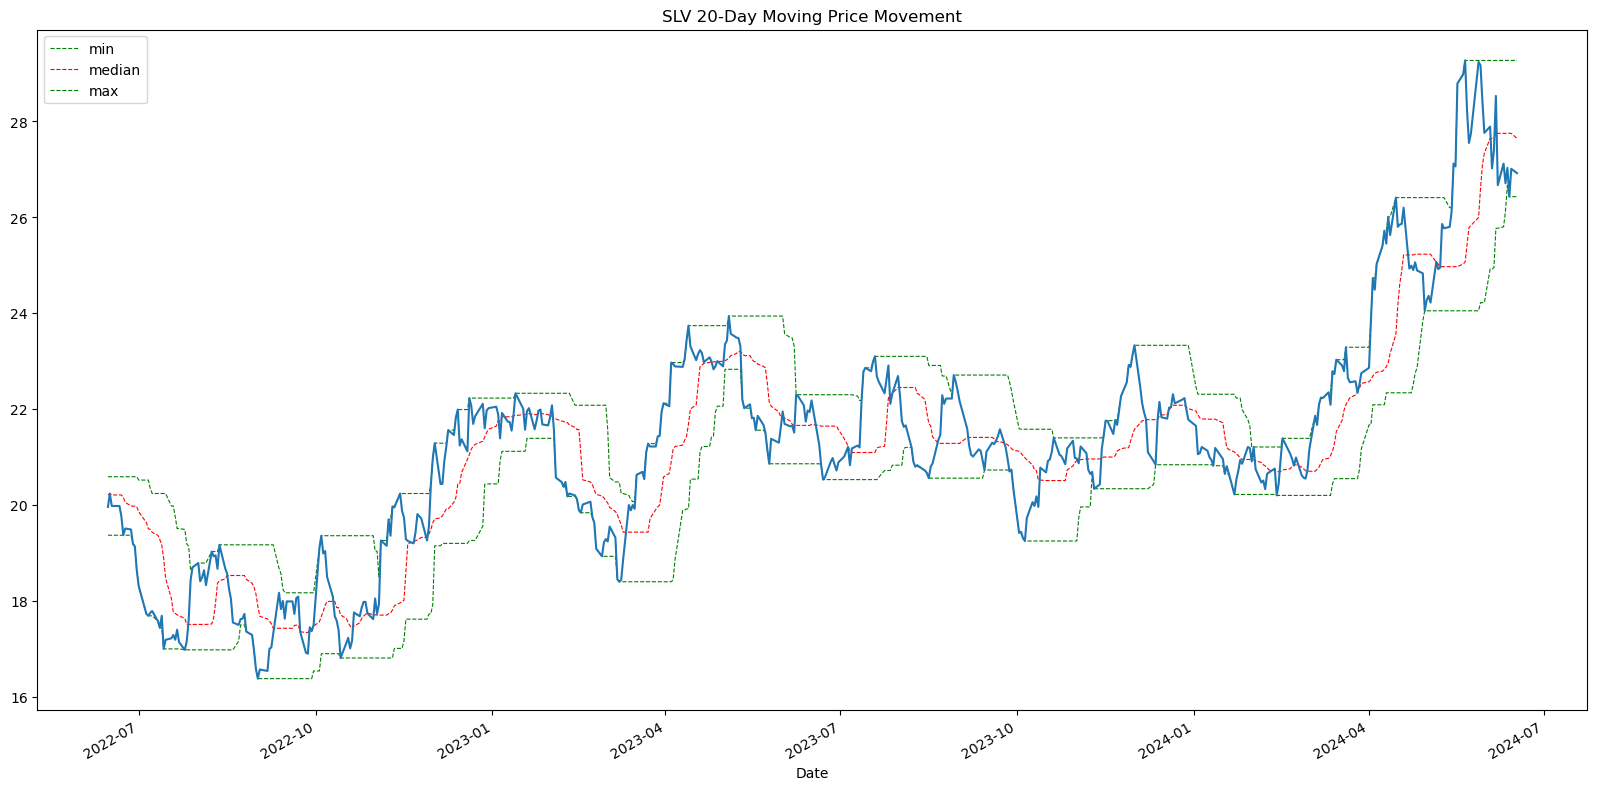

In [22]:
import matplotlib.pyplot as plt

# 최근 2년(504 영업일) 간의 은 ETF의 최저가, 중간값, 상한가 및 주가 시각화
ax = slv_df[['min', 'median', 'max']].iloc[-504:].plot(figsize=(20, 10), style=['g--', 'r--', 'g--'], lw=0.8)
slv_df['SLV'].iloc[-504:].plot(ax=ax)
plt.title('SLV 20-Day Moving Price Movement')
plt.show()

#### 매수 / 매도 타이밍 시각화
- 최근 1개월, 1년 간의 주가 평균으로 매수 / 매도 타이밍 분석

In [23]:
# 최근 1개월 간, 최근 1년 간 영업일의 주가 평균을 새로운 컬럼으로 추가 
slv_df['SMA1'] = slv_df['SLV'].rolling(window=20).mean() # short-term
slv_df['SMA2'] = slv_df['SLV'].rolling(window=252).mean() # long-term
slv_df[['SLV', 'SMA1', 'SMA2']].tail()

,SLV,SMA1,SMA2
Date,,,
2024-06-11,26.71,27.8395,22.372381
2024-06-12,27.03,27.8845,22.392024
2024-06-13,26.43,27.8500,22.410635
2024-06-14,27.01,27.8475,22.430635
2024-06-17,26.92,27.7540,22.450397


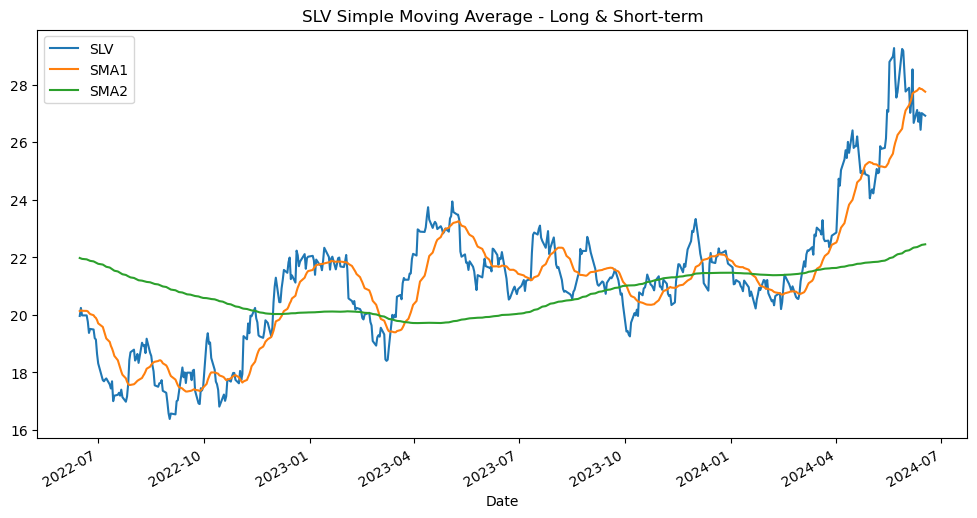

In [24]:
# 최근 2년간 각 영업일의 주가, 월간, 연간 평균 시각화
slv_df[['SLV', 'SMA1', 'SMA2']].iloc[-504:].plot(figsize=(12, 6))
plt.title("SLV Simple Moving Average - Long & Short-term")
plt.show()

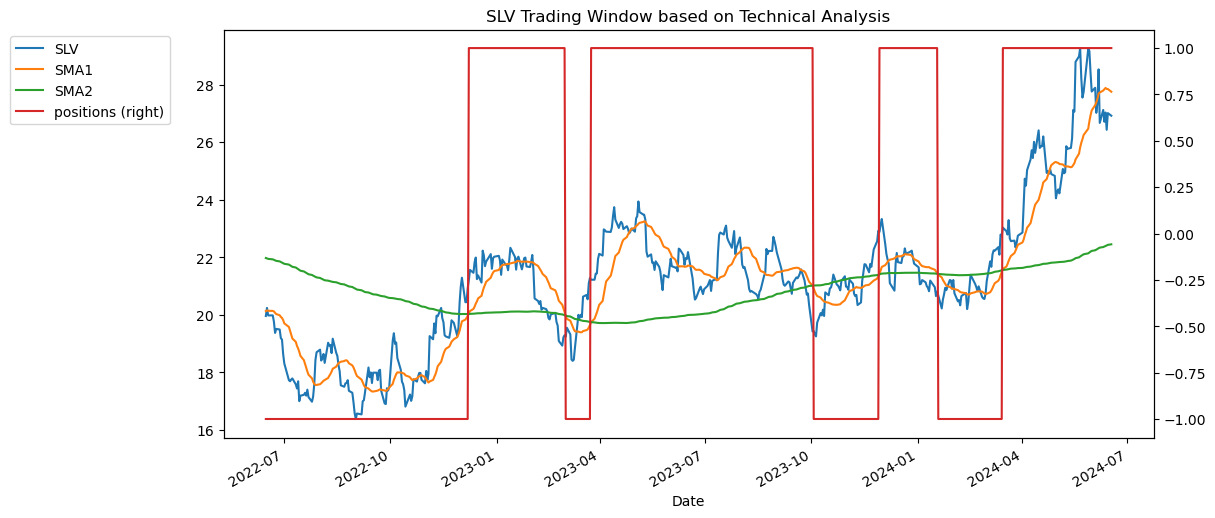

In [25]:
# 결측치 제거
slv_df.dropna(inplace=True)

# 월 평균과 연 평균 주가를 비교하여 매도 및 매수 시기를 나타내는 컬럼 추가
# 1일 때는 매수, -1일 때는 매도
slv_df['positions'] = np.where(slv_df['SMA1'] > slv_df['SMA2'], 1, -1)

# 최근 2년간 각 영업일 별 주가, 월 평균, 연 평균, 매도 / 매수 시기 시각화
ax = slv_df[['SLV', 'SMA1', 'SMA2', 'positions']].iloc[-504:].plot(figsize=(12, 6), secondary_y='positions')
ax.get_legend().set_bbox_to_anchor((-0.05, 1))

plt.title("SLV Trading Window based on Technical Analysis")
plt.show()

### 🩶 ARIMA 모델로 은 가격 예측
- 최적의 차분 수를 구하고 auto_arima를 사용하여 하이퍼 파라미터까지 최적화한 다음,  
  해당 모델로 올해 초부터의 은 ETF 가격을 예측하여 실제 주가와 비교

In [26]:
# 최근 2년간의 데이터만 가져온 새로운 데이터프레임 선언
pre_s_df = slv_df.iloc[-504:]
pre_s_df

,SLV,min,median,max,SMA1,SMA2,positions
Date,,,,,,,
2022-06-15,19.96,19.37,20.210,20.59,20.1295,21.974762,-1
2022-06-16,20.24,19.37,20.235,20.59,20.1550,21.959643,-1
2022-06-17,19.98,19.37,20.210,20.59,20.1405,21.944167,-1
2022-06-21,19.98,19.37,20.210,20.59,20.1360,21.927897,-1
2022-06-22,19.76,19.37,20.210,20.59,20.1190,21.911667,-1
...,...,...,...,...,...,...,...
2024-06-11,26.71,26.13,27.750,29.27,27.8395,22.372381,1
2024-06-12,27.03,26.67,27.750,29.27,27.8845,22.392024,1
2024-06-13,26.43,26.43,27.750,29.27,27.8500,22.410635,1


In [27]:
# train과 test를 8:2 비율로 분할 - 앞족 80%, 뒤쪽 20%
y_train = pre_s_df['SLV'][:int(0.8 * len(pre_s_df))]
y_test = pre_s_df['SLV'][int(0.8 * len(pre_s_df)):]

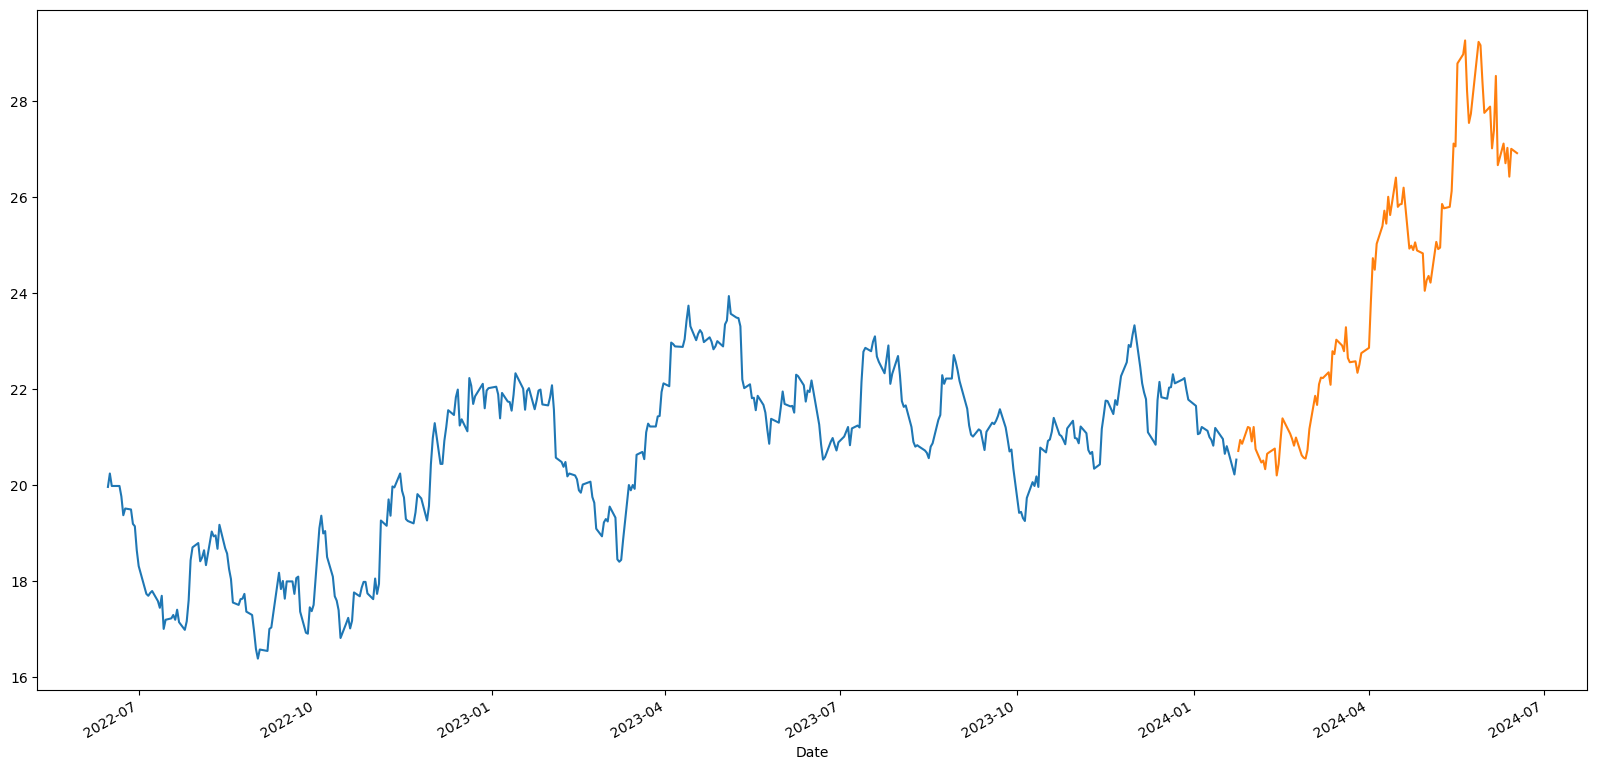

In [28]:
# train, test 시각화
plt.figure(figsize=(20, 10))
y_train.plot()
y_test.plot()
plt.show()

#### 🔢 최적의 차분 수 구하기
- 현재 데이터에는 추세가 있기 때문에 정상성이 없음
- 시계열 데이터를 분석하기 위해서는 정상성을 만들어야 하며, 이를 위해 차분을 수행
- 서로 다른 3가지 알고리즘으로 최적의 차분 수를 산출하고, 아래의 auto_arima()에 할당

In [29]:
from pmdarima.arima import ndiffs

# 서로 다른 3가지 알고리즘으로 차분 수 산출
kpss_diffs = ndiffs(y_train, alpha=0.05, test='kpss', max_d=10)
adf_diffs = ndiffs(y_train, alpha=0.05, test='adf', max_d=10)
pp_diffs = ndiffs(y_train, alpha=0.05, test='pp', max_d=10)

# 위의 3가지 방식으로 구한 수 중 최대 값 구하기
n_diffs = max(kpss_diffs, adf_diffs, pp_diffs)

print(f'd = {n_diffs}')

d = 1


#### 📈 1차 차분 후의 ACF랑 PACF 그래프 시각화
- 최적 차분 했을 때 정상성이 생기는 지 확인

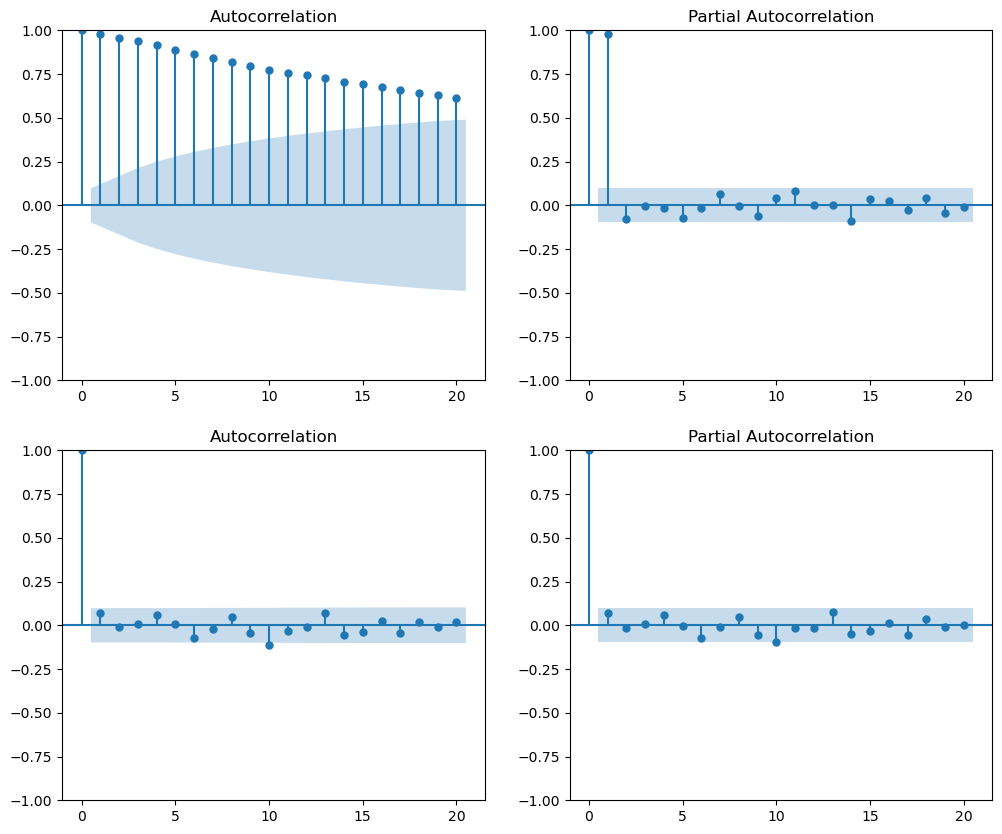

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF, PACF 시각화
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# 원본
plot_acf(y_train, lags=20, ax=ax[0][0])
plot_pacf(y_train, lags=20, ax=ax[0][1])

# 1차 차분 후
plot_acf(y_train.diff().dropna(), lags=20, ax=ax[1][0])
plot_pacf(y_train.diff().dropna(), lags=20, ax=ax[1][1])

plt.show()

#### 분석
- 위 3가지 알고리즘으로 구한 최적의 차분 수(1)로 차분한 결과 정상성이 생겼다.
- 또한 차분 이전 원본의 ACF와 PACF 그래프의 형태로 보아 이 데이터는 1차 자기회귀 모형이며,  
  이는 현재의 데이터는 직전 시점의 데이터에 영향을 가장 많이 받는다는 것을 의미한다.

In [31]:
import pmdarima as pm

# auto_arima로 하이퍼 파라미터 최적화
# d(누적 차분 수)에는 위에서 구한 최적 차분 수 할당
# p, q에는 각각 AR(자기회귀 차수)과 MA(이동평균 차수)에 들어갈 값의 범위 지정 (이번에는 0 ~ 10)
model = pm.auto_arima(y=y_train,
                      d=1,
                      start_p=0, max_p=10,
                      start_q=0, max_q=10,
                      m=1, seasonal=False,
                      stepwise=True,
                      trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=307.518, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=307.521, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=307.474, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=305.525, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=309.450, Time=0.10 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.255 seconds


In [32]:
# 모델 fit
model.fit(y_train)

ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [33]:
# 모델 성능 지표 출력
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  403
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -151.762
Date:                Tue, 18 Jun 2024   AIC                            305.525
Time:                        13:13:24   BIC                            309.521
Sample:                             0   HQIC                           307.107
                                - 403                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.1246      0.006     19.696      0.000       0.112       0.137
Ljung-Box (L1) (Q):                   2.00   Jarque-Bera (JB):                71.53
Prob(Q):                              0.16   Pr

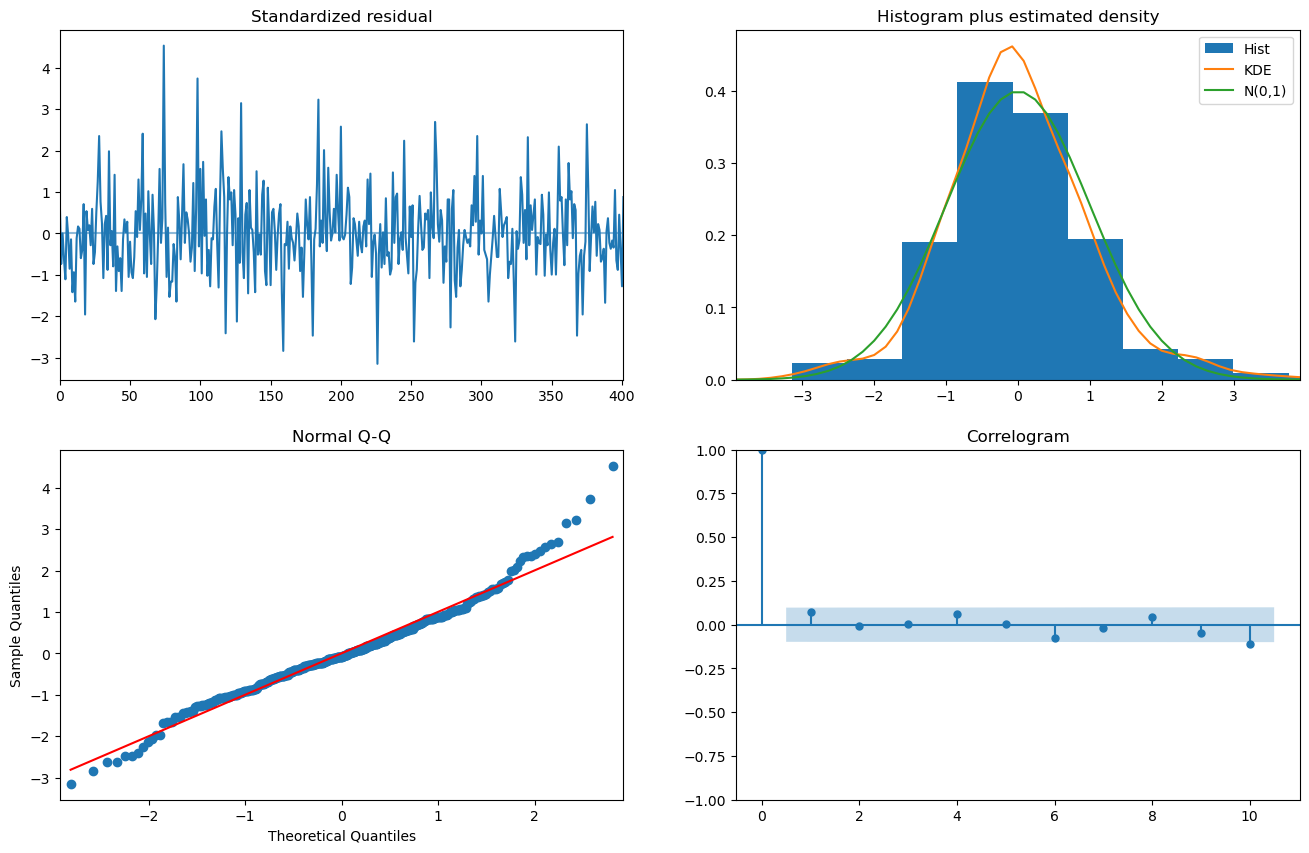

In [34]:
import matplotlib.pyplot as plt

# 모델의 차분, 분포, ACF 시각화
model.plot_diagnostics(figsize=(16, 10))
plt.show()

#### 모델 분석
- Prob(Q): 0.05 이상으로 측정되었기 때문에 이 데이터는 서로 독립적이며 동일한 분포를 따른다고 할 수 있다.
- Prob(H): 0.05 미만으로 측정되었기 때문에
  이 데이터는 잔차(실제-예측값 차이)의 분산이 일정하지 않다고 할 수 있다.
- Prob(JB): 0.05 미만으로 측정되었기 때문에 평균과 분산이 일정하지 않다고 할 수 있다.
- Skew: 수치 상으로 볼 때, 이 데이터는 분포가 양의 방향에 약간 쏠려있다고 할 수 있다.
- Kurtosis: 약 4.8 정도로 측정되었기 때문에, 정규분포(Kurtosis=3)보다 첨도가 높다고 할 수 있다.

#### 🔎 ARIMA 모델로 test 데이터 예측
- 한 시점의 결과를 예측할 때마다, 예측값을 토대로 모델 업데이트
- 이는 예측 결과가 등차수열 혹은 일정한 값으로만 예측되는 현상을 방지하기 위함

In [35]:
# 데이터 하나를 예측할 때마다의 결과를 반환하는 함수
def predict_one_step():
    prediction = model.predict(n_periods=1)
    return prediction.tolist()[0]

In [36]:
p_list = []

# test 데이터를 하나씩 예측하면서 예측값을 리스트에 담고, 하나의 데이터를 예측할 때마다 모델 업데이트
for data in y_test:
    p = predict_one_step()
    p_list.append(p)

    model.update(data)

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [37]:
# test 데이터의 시점 별 예측값을 데이터프레임으로 생성
y_predict_df = pd.DataFrame({"test": y_test, "pred": p_list})
y_predict_df

,test,pred
Date,,
2024-01-24,20.71,20.53
2024-01-25,20.94,20.71
2024-01-26,20.86,20.94
2024-01-29,21.21,20.86
2024-01-30,21.19,21.21
...,...,...
2024-06-11,26.71,27.12
2024-06-12,27.03,26.71
2024-06-13,26.43,27.03


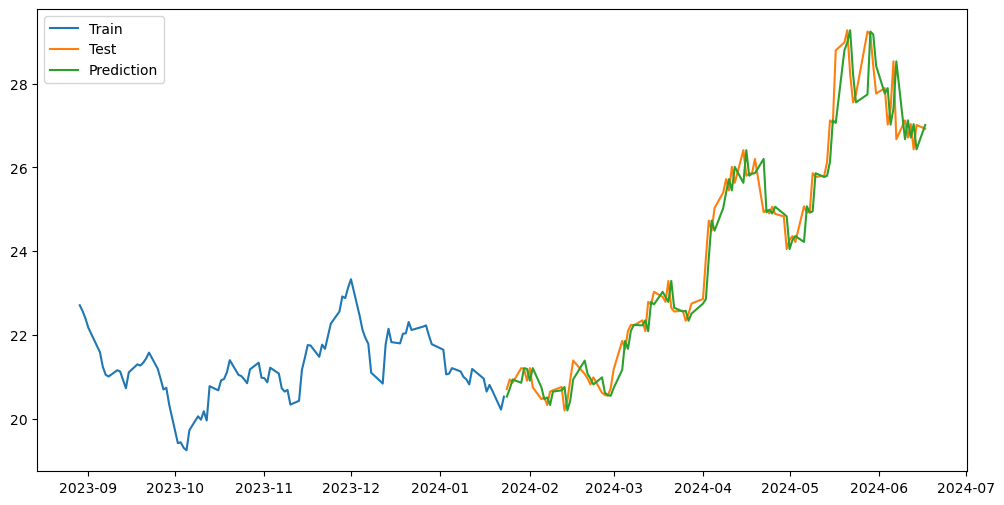

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

# train, test와 예측값을 하나의 플롯에 시각화
# test와 예측 사이의 차이를 확인하는 것이 핵심
plt.plot(y_train.iloc[-101:], label='Train')
plt.plot(y_test, label='Test')
plt.plot(y_predict_df.pred, label='Prediction')
plt.legend()
plt.show()

In [39]:
import numpy as np

# 모델의 예측과 실제 데이터 간 오차(%)를 구해주는 함수
def MAPE(y_test, y_pred):
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# 모델의 예측과 실제 데이터 사이의 오차(%) 산출
print(f'MAPE (%): {MAPE(y_test, p_list):.4f}')

MAPE (%): 1.5269


#### 🚩 ARIMA 모델 예측 결과
- ARIMA 모델로 올해 초부터의 은 ETF 가격을 예측한 결과, 실제 주가 그래프와 약 1.5%의 오차를 보였다. 

### 🩶 Prophet으로 은 가격 예측
- Prophet 딥러닝 모델로 최근 2년 간의 은 ETF 가격을 학습하여 향후 1년의 주가 예측

#### 📑 데이터 전처리
- Prophet에 사용할 수 있는 형태로 데이터 전처리

In [40]:
# 사용할 데이터프레임 재확인
slv_df

,SLV,min,median,max,SMA1,SMA2,positions
Date,,,,,,,
2015-12-31,13.19,13.06,13.455,13.87,13.4160,14.993929,-1
2016-01-04,13.19,13.06,13.440,13.87,13.4025,14.986310,-1
2016-01-05,13.31,13.06,13.370,13.69,13.3745,14.977619,-1
2016-01-06,13.36,13.06,13.335,13.69,13.3615,14.967817,-1
2016-01-07,13.62,13.06,13.335,13.69,13.3670,14.958968,-1
...,...,...,...,...,...,...,...
2024-06-11,26.71,26.13,27.750,29.27,27.8395,22.372381,1
2024-06-12,27.03,26.67,27.750,29.27,27.8845,22.392024,1
2024-06-13,26.43,26.43,27.750,29.27,27.8500,22.410635,1


In [41]:
# 최근 2년 간의 주가(SLV)만 가져온 다음, 기존 인덱스(날짜)를 새로운 컬럼으로 변경
prop_s_df = slv_df.iloc[-504:]['SLV'].reset_index()
prop_s_df

,Date,SLV
0,2022-06-15,19.96
1,2022-06-16,20.24
2,2022-06-17,19.98
3,2022-06-21,19.98
4,2022-06-22,19.76
...,...,...
499,2024-06-11,26.71
500,2024-06-12,27.03
501,2024-06-13,26.43
502,2024-06-14,27.01


In [42]:
# x(날짜) 컬럼의 이름을 ds로 변경
# Prophet 모델에서 사용하는 일종의 컨벤션
prop_s_df = prop_s_df.rename(columns={'Date':'ds',
                                      'SLV': 'y'})
prop_s_df

,ds,y
0,2022-06-15,19.96
1,2022-06-16,20.24
2,2022-06-17,19.98
3,2022-06-21,19.98
4,2022-06-22,19.76
...,...,...
499,2024-06-11,26.71
500,2024-06-12,27.03
501,2024-06-13,26.43
502,2024-06-14,27.01


In [43]:
# train과 test를 8:2 비율로 분할한 데이터프레임 선언 - 앞쪽 80%, 뒤쪽 20%
train_df = prop_s_df[:int(0.8 * len(prop_s_df))]
test_df = prop_s_df[int(0.8 * len(prop_s_df)):]

#### 교차 검증 (Cross Validation)
- 아래의 하이퍼 파라미터를 모든 경우의 수대로 조합한 다음,  
  각 하이퍼 파라미터 조합 중 가장 우수한 성능(가장 적은 오차)을 보였을 때로 튜닝 후 예측
> - changepoint_prior_scale: trend의 변화량을 반영하는 정도 (default=0.05)
> - seasonality_prior_scale: 계절성을 반영하는 정도
> - seasonality_mode: 계절성으로 나타나는 효과를 더해나갈지(additive), 곱해나갈지(multiplicative) 정함

In [44]:
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
import itertools

# 교차 검증 (cross_validation)에 사용할 파라미터와 각 파라미터의 값들(list) 선언
search_space = {
    'changepoint_prior_scale': [0.05, 0.1, 0.5, 1.0, 5.0, 10.0],
    'seasonality_prior_scale': [0.05, 0.1, 1.0, 10.0],
    'seasonality_mode': ['additive', 'multiplicative']
}

# itertools.product: 각 요소들의 모든 경우의 수 조합을 생성
param_combinded = [dict(zip(search_space.keys(), v)) for v in itertools.product(*search_space.values())]

# train, test 데이터의 길이(len) 설정 - 전체 데이터를 8:2 비율로 분할
train_len = int(len(prop_s_df) * 0.8)
test_len = int(len(prop_s_df) * 0.2)

train_size = f'{train_len} days'
test_size = f'{test_len} days'

# pre_b_df의 앞쪽 80%는 train, 뒤쪽 20%는 test 데이터프레임으로 분할
train_df = prop_s_df.iloc[:train_len]
test_df = prop_s_df.iloc[train_len:]

mapes = []

# 각 파라미터 조합으로 Prophet 모델을 세팅하고,
# 해당 조합으로 train 데이터를 fit해서 나온 결과와 같이 데이터프레임 생성
for param in param_combinded:
    model = Prophet(**param)
    model.fit(train_df)

    # 'threads' 옵션은 메모리 사용량은 낮지만 CPU 바운드 작업에는 효과적이지 않을 수 있다.
    # 'dask' 옵션은 대규모의 데이터를 처리하는 데 효과적이다.
    # 'processes' 옵션은 각각의 작업을 별도의 프로세스로 실행하기 때문에 CPU 바운드 작업에 효과적이지만,
    # 메모리 사용량이 높아질 수 있다.
    cv_df = cross_validation(model, initial=train_size, period='20 days', horizon=test_size, parallel='processes')
    df_p = performance_metrics(cv_df, rolling_window=1)
    mapes.append(df_p['mape'].values[0])

# mape는 Mean Absolute Percentage Error (평균 절대비율 오차)의 약자
tuning_result = pd.DataFrame(param_combinded)
tuning_result['mape'] = mapes

13:13:26 - cmdstanpy - INFO - Chain [1] start processing
13:13:26 - cmdstanpy - INFO - Chain [1] done processing
13:13:28 - cmdstanpy - INFO - Chain [1] start processing
13:13:28 - cmdstanpy - INFO - Chain [1] done processing
13:13:30 - cmdstanpy - INFO - Chain [1] start processing
13:13:30 - cmdstanpy - INFO - Chain [1] done processing
13:13:32 - cmdstanpy - INFO - Chain [1] start processing
13:13:32 - cmdstanpy - INFO - Chain [1] done processing
13:13:34 - cmdstanpy - INFO - Chain [1] start processing
13:13:34 - cmdstanpy - INFO - Chain [1] done processing
13:13:36 - cmdstanpy - INFO - Chain [1] start processing
13:13:36 - cmdstanpy - INFO - Chain [1] done processing
13:13:38 - cmdstanpy - INFO - Chain [1] start processing
13:13:38 - cmdstanpy - INFO - Chain [1] done processing
13:13:40 - cmdstanpy - INFO - Chain [1] start processing
13:13:40 - cmdstanpy - INFO - Chain [1] done processing
13:13:42 - cmdstanpy - INFO - Chain [1] start processing
13:13:42 - cmdstanpy - INFO - Chain [1]

In [45]:
# 오차가 적은 순서대로 정렬하여 최적의 파라미터 조합 확인
tuning_result.sort_values(by='mape')

,changepoint_prior_scale,seasonality_prior_scale,seasonality_mode,mape
1,0.05,0.05,multiplicative,0.036410
0,0.05,0.05,additive,0.037002
3,0.05,0.10,multiplicative,0.037243
2,0.05,0.10,additive,0.037670
4,0.05,1.00,additive,0.038236
8,0.10,0.05,additive,0.038744
6,0.05,10.00,additive,0.038911
10,0.10,0.10,additive,0.039205
14,0.10,10.00,additive,0.039270
12,0.10,1.00,additive,0.039554


In [46]:
# 위에서 확인한 최적의 파라미터 값으로 Prophet 모델 세팅
model = Prophet(changepoint_prior_scale=0.05, 
                seasonality_prior_scale=0.05,
                seasonality_mode='multiplicative')

# 파라미터 튜닝 후 전체 데이터 fit
model.fit(prop_s_df)

13:15:18 - cmdstanpy - INFO - Chain [1] start processing
13:15:18 - cmdstanpy - INFO - Chain [1] done processing


In [47]:
# 예측을 바탕으로 향후 1년(365일)간의 데이터 예측
future = model.make_future_dataframe(periods=365)

# 미래 데이터를 Prophet 모델로 예측하고, 예측 결과가 담긴 데이터프레임 출력
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2022-06-15,18.804480,17.875750,19.711712
1,2022-06-16,18.750548,17.842610,19.691172
2,2022-06-17,18.738918,17.833469,19.604789
3,2022-06-21,18.519152,17.640649,19.442802
4,2022-06-22,18.517208,17.550373,19.380978
...,...,...,...,...
864,2025-06-13,42.003549,35.857101,48.179295
865,2025-06-14,37.721570,32.242526,43.189273
866,2025-06-15,37.671250,32.314411,43.151703
867,2025-06-16,41.690141,35.445689,48.054312


In [48]:
# 학습에 사용한 데이터프레임을 복사한 뒤, 날짜를 인덱스로 지정
c_prop_s_df = prop_s_df.copy()
c_prop_s_df.set_index('ds', inplace=True)

# 미래 예측 데이터프레임을 복사한 뒤, 마찬가지로 날짜를 인덱스로 지정 
forecast_df = forecast.copy()
forecast_df = forecast_df.set_index('ds')

# 인덱스가 된 날짜(현재 문자열 타입)를 datetime 형식으로 변경
c_prop_s_df.index = pd.to_datetime(c_prop_s_df.index)
forecast_df.index = pd.to_datetime(forecast_df.index)

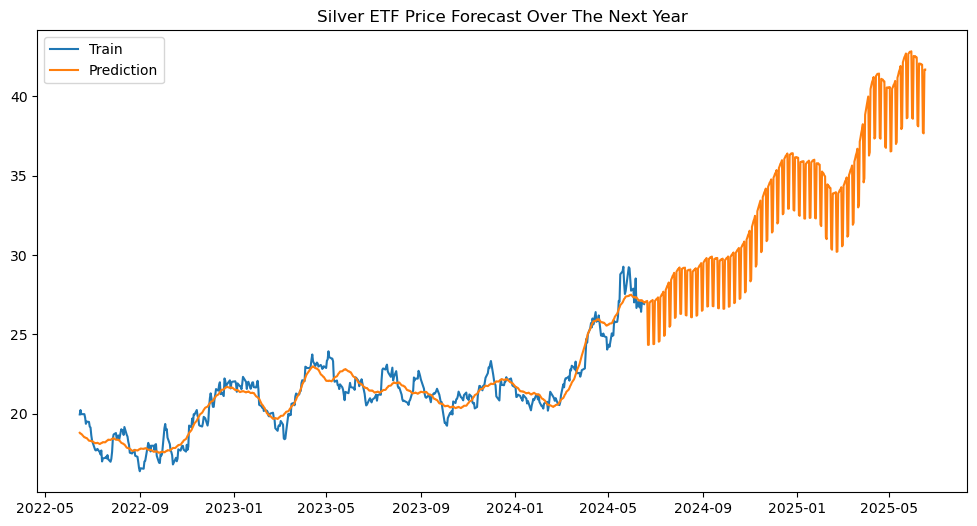

In [49]:
# 훈련 데이터(오늘까지)와 미래 예측(향후 1년) 데이터 그래프 시각화
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
plt.plot(c_prop_s_df[['y']], label='Train')
plt.plot(forecast_df[['yhat']], label='Prediction')
plt.title('Silver ETF Price Forecast Over The Next Year')
plt.legend()
plt.show()

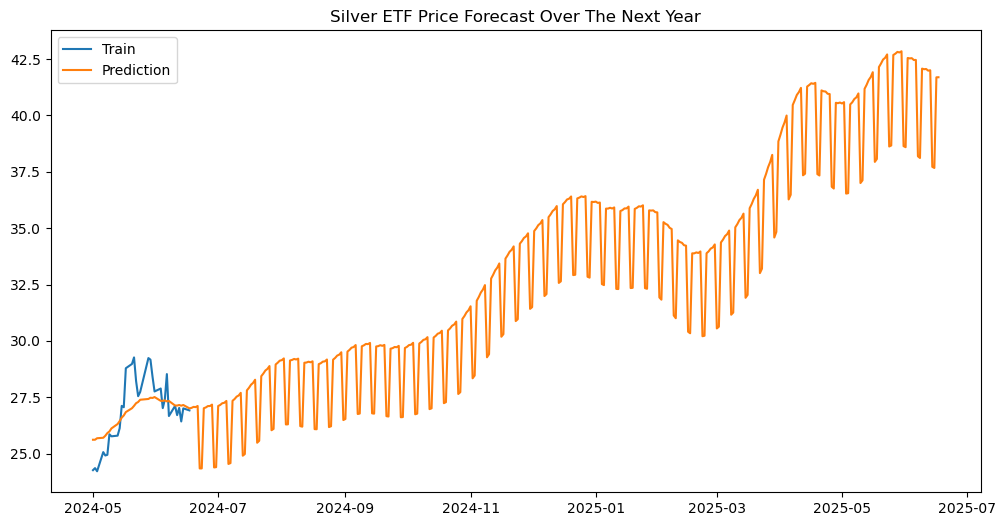

In [50]:
# 이상이 생긴 부분만 확대
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
plt.plot(c_prop_s_df.loc['2024-05-01':][['y']], label='Train')
plt.plot(forecast_df.loc['2024-05-01':][['yhat']], label='Prediction')
plt.title('Silver ETF Price Forecast Over The Next Year')
plt.legend()
plt.show()

#### ❗ 이슈 발생
- 현재 모델 예측 결과가 심한 편자를 보이며,  
  이 과정에서 원래라면 불가능한 음수 값도 포함되어 있는 것을 확인했다.
- 이는 모델의 하이퍼 파라미터 중 seasonality_mode를 multiplicative로 줬기 때문인 것으로 보인다.
- 따라서, seasonality_mode가 additive인 조합 중 가장 우수한 성능을 보였을 때의  
  하이퍼 파라미터로 모델을 다시 튜닝한 뒤 예측한다.

#### 하이퍼 파라미터 조정

In [51]:
# additive가 포함된 하이퍼 파라미터 조합 중 가장 우수한 조합으로 Prophet 모델 세팅
model = Prophet(changepoint_prior_scale=0.05, 
                seasonality_prior_scale=0.05,
                seasonality_mode='additive')

# 파라미터 튜닝 후 전체 데이터 fit
model.fit(prop_s_df)

13:15:19 - cmdstanpy - INFO - Chain [1] start processing
13:15:19 - cmdstanpy - INFO - Chain [1] done processing


In [52]:
# 예측을 바탕으로 향후 1년(365일)간의 데이터 예측
future = model.make_future_dataframe(periods=365)

# 미래 데이터를 Prophet 모델로 예측하고, 예측 결과가 담긴 데이터프레임 출력
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2022-06-15,18.942601,18.048904,19.912853
1,2022-06-16,18.885178,18.009855,19.776618
2,2022-06-17,18.875402,17.886626,19.794382
3,2022-06-21,18.631254,17.709630,19.481886
4,2022-06-22,18.626582,17.770157,19.548379
...,...,...,...,...
864,2025-06-13,42.334445,36.402494,47.873084
865,2025-06-14,42.252639,36.477980,47.993405
866,2025-06-15,42.250489,36.110475,47.996605
867,2025-06-16,42.238373,36.200819,47.976532


In [53]:
# 학습에 사용한 데이터프레임을 복사한 뒤, 날짜를 인덱스로 지정
c_prop_s_df = prop_s_df.copy()
c_prop_s_df.set_index('ds', inplace=True)

# 미래 예측 데이터프레임을 복사한 뒤, 마찬가지로 날짜를 인덱스로 지정 
forecast_df = forecast.copy()
forecast_df = forecast_df.set_index('ds')

# 인덱스가 된 날짜(현재 문자열 타입)를 datetime 형식으로 변경
c_prop_s_df.index = pd.to_datetime(c_prop_s_df.index)
forecast_df.index = pd.to_datetime(forecast_df.index)

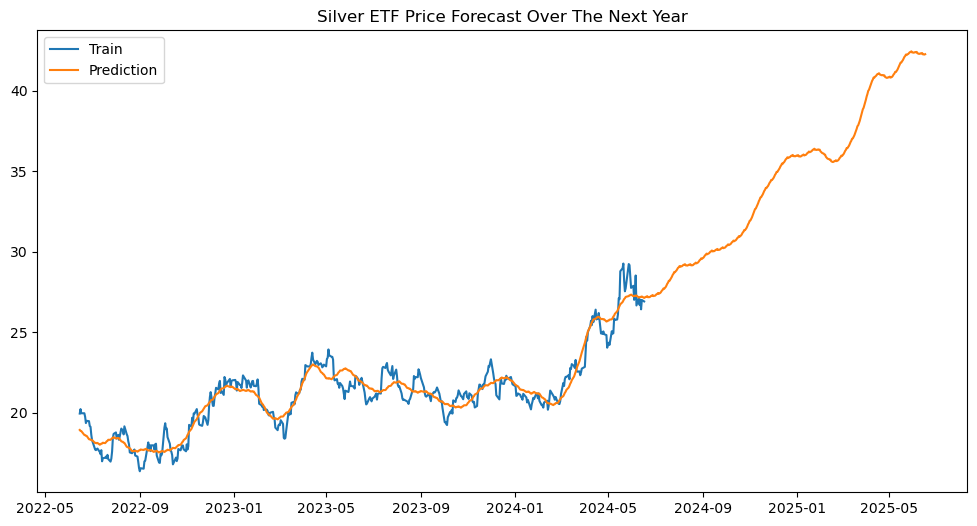

In [54]:
# 훈련 데이터(오늘까지)와 미래 예측(향후 1년) 데이터 그래프 시각화
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
plt.plot(c_prop_s_df[['y']], label='Train')
plt.plot(forecast_df[['yhat']], label='Prediction')
plt.title('Silver ETF Price Forecast Over The Next Year')
plt.legend()
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\ProgramData\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


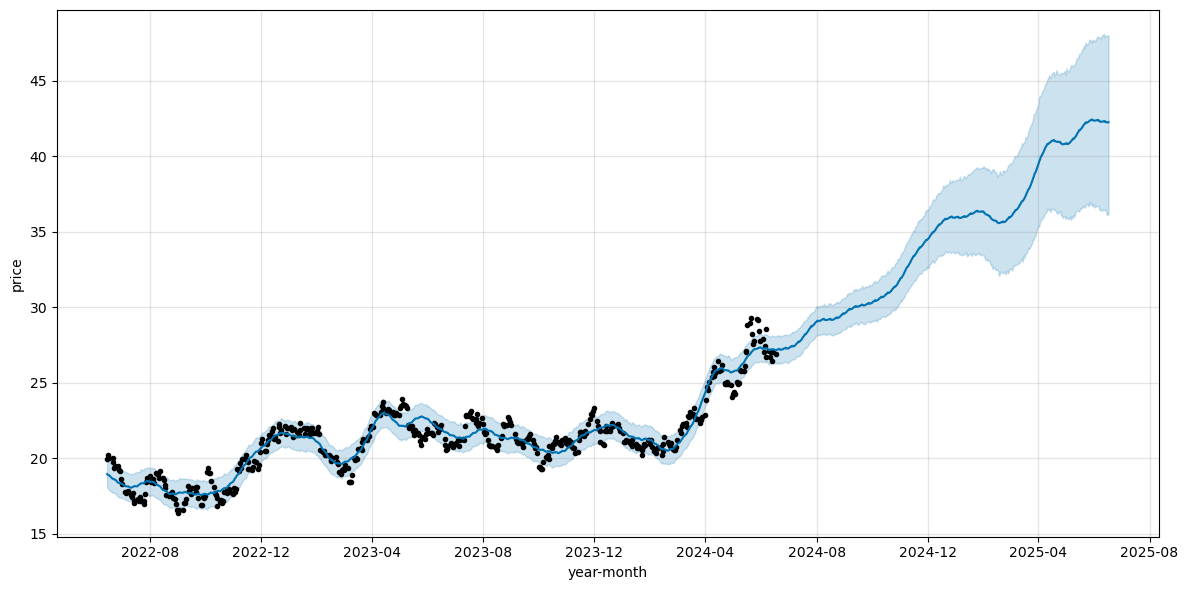

In [55]:
# 미래 예측 그래프와 예측한 미래 데이터의 신뢰 구간 시각화 
model.plot(forecast, figsize=(12, 6), xlabel='year-month', ylabel='price')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\ProgramData\anaconda3\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
C:\ProgramData\anaconda3\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np

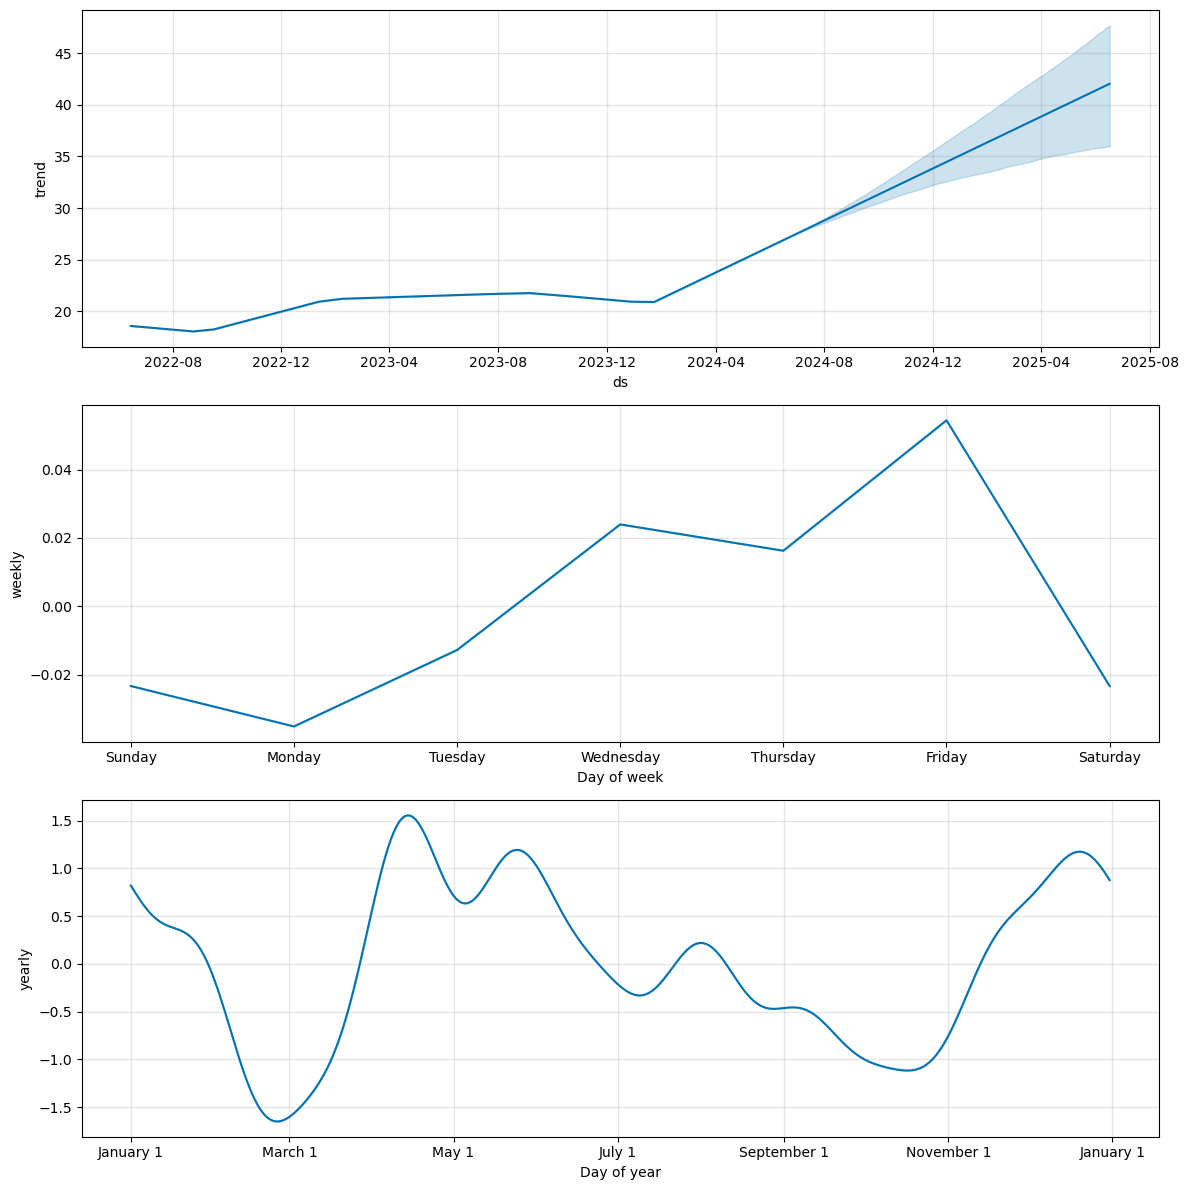

In [56]:
# 미래를 예측한 모델의 예측 데이터 + 신뢰 구간, 요일 별 주가 변화량, 계절에 따른 주가 변화 그래프 시각화
model.plot_components(forecast, figsize=(12, 12))
plt.show()

#### 🚩 Prophet 모델 예측 결과
- Prophet 모델로 향후 1년간의 은 ETF 가격을 예측한 결과,  
  2025년 6월까지 기존의 상승 추세를 이어나갈 것이라고 예측했다.
- 요일에 따른 수익률 예측 결과 그래프로 보아,  
  이 모델은 매주 월요일에 수익률 최저치를 기록한 뒤 금요일에 최고치를 달성할 것이라고 예측했다.
- 계절에 따른 수익률 예측 결과에서는 3월에 최저치, 4월에는 최고치를 기록할 것이라고 예측했다.  
  이는 예측 그래프에서 2025년 3월 경 주가가 한 번 하락하는 현상이 나타난 것으로 보인다.
- 그리고 신뢰 구간의 편차가 매우 크게 나타났는데, 이는 원본 데이터가 변동률이 적고  
  그만큼 여러 bias를 고려했을 때의 편차가 큰 것이 원인이다.
  
---

- 종합해 봤을 때, 이 모델은 앞으로의 은 ETF 시세를 긍정적인 전망으로 보고 있다고 할 수 있다.